In [ ]:
from keras.applications.inception_v3 import InceptionV3
# for mathematical operations
import numpy as np
import pandas as pd
import matplotlib
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# to transform a png to an array
from matplotlib.image import imread
import os
import tensorflow as tf

In [ ]:
# To generate GIFs
!pip install imageio
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-ao3ad3i0
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-ao3ad3i0
  Resolved https://github.com/tensorflow/docs to commit ec3a1b3f9a604c6cd26c7537f2b9fd270a3eedbf
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2024.3.27.3713-py3-none-any.whl size=182447 sha256=cefb4394752c1554598a50378782de79970778d8d1e8e714117b2045075f7db9
  Stored in directory: /tmp/pip-ephem-wheel-cache-49pmelk6/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [ ]:
os.listdir('..')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA

In [ ]:
# empty lists to store image paths
hs_img_path = []
ihs_img_path = []

#  !TODO: FIX ME HERE
# Replace the path in the os.listdir to the file path to our dataset. What should them be and how to set it up for sharing?
for image_path in os.listdir('../content/drive/MyDrive/CandleStick-image/H&S-NonShaded/H&S-NonShaded-Bear-90_'): # loop through all image names in 'H&S' folder
    hs_img_path.append('../content/drive/MyDrive/CandleStick-image/H&S-NonShaded/H&S-NonShaded-Bear-90_/' + image_path) # create the path for the particular image
for image_path in os.listdir('../content/drive/MyDrive/CandleStick-image/H&S-NonShaded/H&S-NonShaded-Bull-10_'): # loop through all image names in 'H&S' folder
    hs_img_path.append('../content/drive/MyDrive/CandleStick-image/H&S-NonShaded/H&S-NonShaded-Bull-10_/' + image_path) # create the path for the particular image

for image_path in os.listdir('../content/drive/MyDrive/CandleStick-image/IH&S-NonShaded/IH&S-NonShaded-Bear-10_'): # loop through all image names in 'IH&S' folder
    ihs_img_path.append('../content/drive/MyDrive/CandleStick-image/IH&S-NonShaded/IH&S-NonShaded-Bear-10_/' + image_path) # create the path for the particular image

for image_path in os.listdir('../content/drive/MyDrive/CandleStick-image/IH&S-NonShaded/IH&S-NonShaded-Bull-90_'): # loop through all image names in 'IH&S' folder
    ihs_img_path.append('../content/drive/MyDrive/CandleStick-image/IH&S-NonShaded/IH&S-NonShaded-Bull-90_/' + image_path) # create the path for the particular image

pattern_type_hs = len(hs_img_path) * ['head_and_shoulder'] # create a list with all values as 'parasitized' with the length of list being the length of par_img_path
pattern_type_ihs = len(ihs_img_path) * ['inverse_head_and_shoulder'] # create a list with all values as 'uninfected' with the length of list being the length of uninf_img_path

# create a dataframe with a column containing hs images' path and another column with the label from pattern
df_hs = pd.DataFrame({'image_path': hs_img_path, 'pattern_type': pattern_type_hs})
# create a dataframe with a column containing ihs images' path and another column with the label from pattern
df_ihs = pd.DataFrame({'image_path': ihs_img_path, 'pattern_type': pattern_type_ihs})

df = pd.concat([df_hs, df_ihs]) # concat both the dataframes along rows to get the final dataframe

df = df.reset_index(drop=True) # reset index to be from 0 to length of dataframe. drop=True drops the initial index, which otherwise is added as a new column
df

,image_path,pattern_type
0,../content/drive/MyDrive/CandleStick-image/H&S...,head_and_shoulder
1,../content/drive/MyDrive/CandleStick-image/H&S...,head_and_shoulder
2,../content/drive/MyDrive/CandleStick-image/H&S...,head_and_shoulder
3,../content/drive/MyDrive/CandleStick-image/H&S...,head_and_shoulder
4,../content/drive/MyDrive/CandleStick-image/H&S...,head_and_shoulder
...,...,...
65,../content/drive/MyDrive/CandleStick-image/IH&...,inverse_head_and_shoulder
66,../content/drive/MyDrive/CandleStick-image/IH&...,inverse_head_and_shoulder
67,../content/drive/MyDrive/CandleStick-image/IH&...,inverse_head_and_shoulder
68,../content/drive/MyDrive/CandleStick-image/IH&...,inverse_head_and_shoulder


## Train Test split

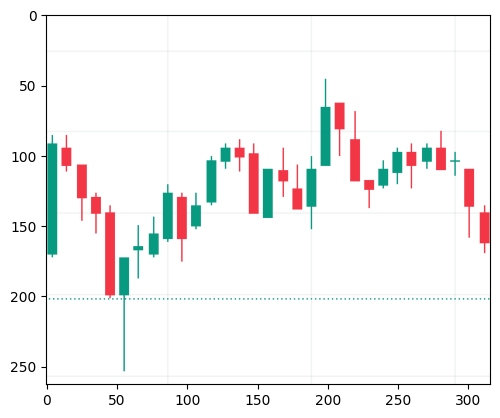

In [ ]:
plt.imshow(imread(df['image_path'][0]));

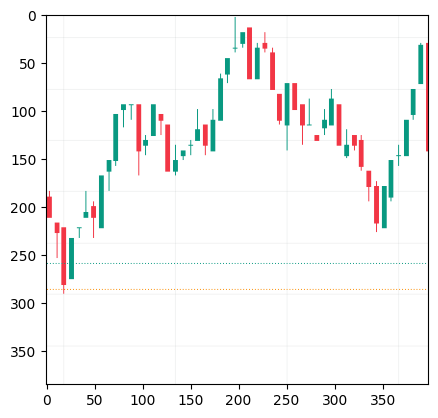

In [ ]:
plt.imshow(imread(df['image_path'].iloc[-1]));

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_hs, test_hs = train_test_split(df[df['pattern_type'] == 'head_and_shoulder'],test_size=0.15) # test set is 15% of available data
train_ihs, test_ihs = train_test_split(df[df['pattern_type'] == 'inverse_head_and_shoulder'],test_size=0.15) # test set is 15% of available data
df_train = pd.concat([train_hs, train_ihs])
df_test = pd.concat([test_hs, test_ihs])
# empty lists to store length and width of images
dim1 = []
dim2 = []

for image_filename in df_test['image_path']:
    if image_filename[-3:] == 'png': # to eliminate encountering Thumbs.db (Thumbs.db is nothing but the image cache file)
        img = imread(image_filename)
        d1,d2,colors = img.shape #(image.shape is in the form (130, 130, 3))
        dim1.append(d1)
        dim2.append(d2)

Plot for distribution of dimension of images in test_df:

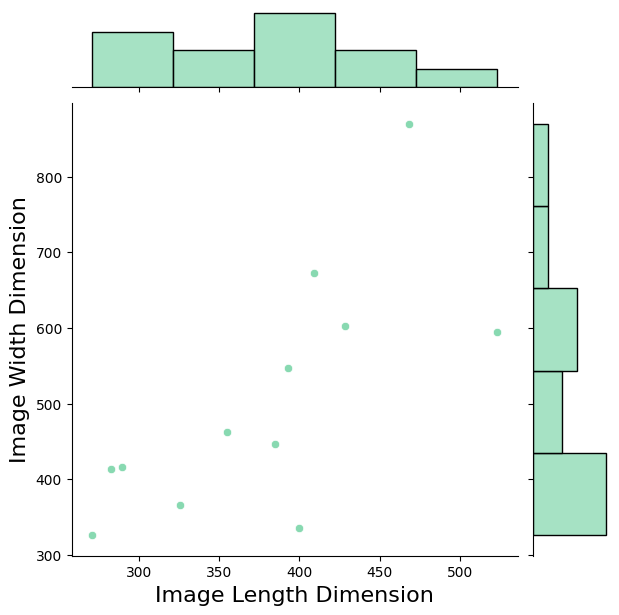

In [ ]:
h = sns.jointplot(x=dim1,y=dim2, color='#88D9B1');
h.set_axis_labels('Image Length Dimension', 'Image Width Dimension', fontsize=16)
h

# Baseline 1: CNN with 70 images

### Setup

In [ ]:
np.mean(dim1)

377.5833333333333

In [ ]:
np.mean(dim2)

504.5833333333333

In [ ]:
image_shape = (300,500,3) # the 3 represents the number of channels (r, g, b)

### Dependencies

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix
from keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator

### Process Images and load them for training

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2) # patience is the number of epochs to wait before early stop if no progress on the validation set

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255) # can add other parameters here too

In [ ]:
# generate batches for training
training_set =  train_datagen.flow_from_dataframe(dataframe = df_train,
                                                  x_col='image_path', # column in `dataframe` that contains the filenames
                                                  y_col='pattern_type', # column in `dataframe` that has the target data
                                                  class_mode='binary', # because oyr dataset is binary
                                                  target_size=(image_shape[0],image_shape[1]), # target image size (length, width)
                                                  batch_size=32); # add batch size

# generate batches for testing
test_set = test_datagen.flow_from_dataframe(dataframe = df_test,
                                            x_col='image_path',
                                            y_col='pattern_type',
                                            class_mode='binary',
                                            target_size=(image_shape[0],image_shape[1]),
                                            shuffle=False,
                                            batch_size=32);

Found 58 validated image filenames belonging to 2 classes.
Found 12 validated image filenames belonging to 2 classes.


In [ ]:
training_set

### Applying Inception V3

In [ ]:
inception = InceptionV3(input_shape=image_shape, weights='imagenet', include_top=False)
for layer in inception.layers:
  layer.trainable = False

In [ ]:
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

inception_model = Model(inputs=inception.input, outputs=predictions)

inception_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
results = inception_model.fit(training_set,epochs=50,
                              validation_data=test_set,
                              callbacks=[early_stop]) ## set early stop as false to try increase accuracy

Epoch 1/50
2/2 [==============================] - 54s 26s/step - loss: 1.3233 - accuracy: 0.4828 - val_loss: 0.7729 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 32s 18s/step - loss: 0.7308 - accuracy: 0.6207 - val_loss: 0.5741 - val_accuracy: 0.5833
Epoch 3/50
2/2 [==============================] - 42s 26s/step - loss: 0.4463 - accuracy: 0.7414 - val_loss: 0.3935 - val_accuracy: 0.9167
Epoch 4/50
2/2 [==============================] - 36s 20s/step - loss: 0.5209 - accuracy: 0.7759 - val_loss: 0.4448 - val_accuracy: 0.5833
Epoch 5/50
2/2 [==============================] - 33s 19s/step - loss: 0.4222 - accuracy: 0.8448 - val_loss: 0.5447 - val_accuracy: 0.5833


### Plot Loss

In [ ]:
losses = pd.DataFrame(inception_model.history.history)

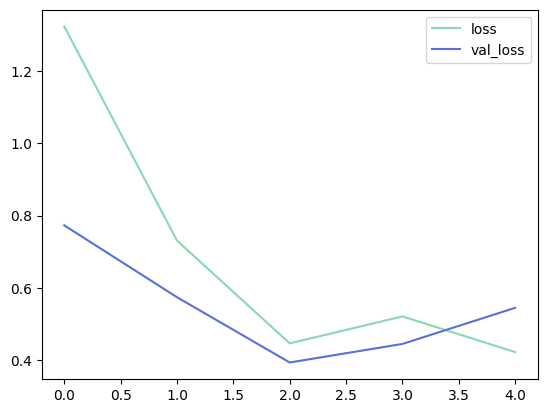

In [ ]:
losses[['loss','val_loss']].plot(color=['#88D9B1', '#5770DB']);

### Confusion Matrix

1/1 [==============================] - 6s 6s/step
              precision    recall  f1-score   support

           0       0.56      0.83      0.67         6
           1       0.67      0.33      0.44         6

    accuracy                           0.58        12
   macro avg       0.61      0.58      0.56        12
weighted avg       0.61      0.58      0.56        12



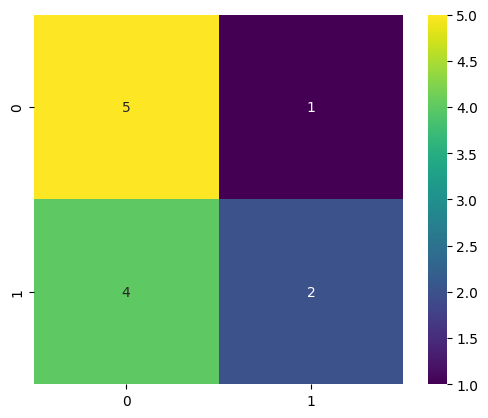

In [ ]:
pred_probabilities = inception_model.predict(test_set)
predictions = pred_probabilities > 0.5

print(classification_report(test_set.classes,predictions))


from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(df_test['pattern_type'].map({'head_and_shoulder': 0, 'inverse_head_and_shoulder': 1}),predictions)
f = sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', square=True)

### Accuracy

In [ ]:
inception_model_accuracy = losses['val_accuracy'].iloc[-1].round(2) * 100
inception_model_accuracy

57.99999999999999

In [ ]:
inception_model.save('inception_pattern.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Baseline 2: 420 images with CNN

In [ ]:
# empty lists to store image paths
hs_img_path = []
ihs_img_path = []

#  !TODO: FIX ME HERE
# Replace the path in the os.listdir to the file path to our dataset. What should them be and how to set it up for sharing?

for image_path in os.listdir('../content/drive/MyDrive/CandleStick-image/H&S-NonShaded/H&S-NonShaded-Bear-90_'): # loop through all image names in 'H&S' folder
    hs_img_path.append('../content/drive/MyDrive/CandleStick-image/H&S-NonShaded/H&S-NonShaded-Bear-90_/' + image_path) # create the path for the particular image
for image_path in os.listdir('../content/drive/MyDrive/CandleStick-image/H&S-NonShaded/H&S-NonShaded-Bull-10_'): # loop through all image names in 'H&S' folder
    hs_img_path.append('../content/drive/MyDrive/CandleStick-image/H&S-NonShaded/H&S-NonShaded-Bull-10_/' + image_path) # create the path for the particular image

for image_path in os.listdir('../content/drive/MyDrive/capstone1/H&S-NonShaded/H&S-NonShaded-Bear'): # loop through all image names in 'H&S' folder
    hs_img_path.append('../content/drive/MyDrive/capstone1/H&S-NonShaded/H&S-NonShaded-Bear/' + image_path) # create the path for the particular image
for image_path in os.listdir('../content/drive/MyDrive/capstone1/H&S-NonShaded/H&S-NonShaded-Bull'): # loop through all image names in 'H&S' folder
    hs_img_path.append('../content/drive/MyDrive/capstone1/H&S-NonShaded/H&S-NonShaded-Bull/' + image_path) # create the path for the particular image

for image_path in os.listdir('../content/drive/MyDrive/capstone2/H&S-NonShaded/H&S-NonShaded-Bear-90_'): # loop through all image names in 'H&S' folder
    hs_img_path.append('../content/drive/MyDrive/capstone2/H&S-NonShaded/H&S-NonShaded-Bear-90_/' + image_path) # create the path for the particular image
for image_path in os.listdir('../content/drive/MyDrive/capstone2/H&S-NonShaded/H&S-NonShaded-Bull-10_'): # loop through all image names in 'H&S' folder
    hs_img_path.append('../content/drive/MyDrive/capstone2/H&S-NonShaded/H&S-NonShaded-Bull-10_/' + image_path) # create the path for the particular image

for image_path in os.listdir('../content/drive/MyDrive/capstone3/H&S-NonShaded/H&S-NonShaded-Bear-90_'): # loop through all image names in 'H&S' folder
    hs_img_path.append('../content/drive/MyDrive/capstone3/H&S-NonShaded/H&S-NonShaded-Bear-90_/' + image_path) # create the path for the particular image
for image_path in os.listdir('../content/drive/MyDrive/capstone3/H&S-NonShaded/H&S-NonShaded-Bull-10_'): # loop through all image names in 'H&S' folder
    hs_img_path.append('../content/drive/MyDrive/capstone3/H&S-NonShaded/H&S-NonShaded-Bull-10_/' + image_path) # create the path for the particular image

for image_path in os.listdir('../content/drive/MyDrive/capstone4/HS-Nonshaded/HS-Bear'): # loop through all image names in 'H&S' folder
    hs_img_path.append('../content/drive/MyDrive/capstone4/HS-Nonshaded/HS-Bear/' + image_path) # create the path for the particular image
for image_path in os.listdir('../content/drive/MyDrive/capstone4/HS-Nonshaded/HS-Bull'): # loop through all image names in 'H&S' folder
    hs_img_path.append('../content/drive/MyDrive/capstone4/HS-Nonshaded/HS-Bull/' + image_path) # create the path for the particular image

for image_path in os.listdir('../content/drive/MyDrive/capstone5/H&S-NonShaded/H&S-NonShaded-Bear'): # loop through all image names in 'H&S' folder
    hs_img_path.append('../content/drive/MyDrive/capstone5/H&S-NonShaded/H&S-NonShaded-Bear/' + image_path) # create the path for the particular image
for image_path in os.listdir('../content/drive/MyDrive/capstone5/H&S-NonShaded/H&S-NonShaded-Bull'): # loop through all image names in 'H&S' folder
    hs_img_path.append('../content/drive/MyDrive/capstone5/H&S-NonShaded/H&S-NonShaded-Bull/' + image_path) # create the path for the particular image

for image_path in os.listdir('../content/drive/MyDrive/CandleStick-image/IH&S-NonShaded/IH&S-NonShaded-Bear-10_'): # loop through all image names in 'IH&S' folder
    ihs_img_path.append('../content/drive/MyDrive/CandleStick-image/IH&S-NonShaded/IH&S-NonShaded-Bear-10_/' + image_path) # create the path for the particular image
for image_path in os.listdir('../content/drive/MyDrive/CandleStick-image/IH&S-NonShaded/IH&S-NonShaded-Bull-90_'): # loop through all image names in 'IH&S' folder
    ihs_img_path.append('../content/drive/MyDrive/CandleStick-image/IH&S-NonShaded/IH&S-NonShaded-Bull-90_/' + image_path) # create the path for the particular image

for image_path in os.listdir('../content/drive/MyDrive/capstone1/IH&S-NonShaded/IH&S-NonShaded-Bear'): # loop through all image names in 'IH&S' folder
    ihs_img_path.append('../content/drive/MyDrive/capstone1/IH&S-NonShaded/IH&S-NonShaded-Bear/' + image_path) # create the path for the particular image
for image_path in os.listdir('../content/drive/MyDrive/capstone1/IH&S-NonShaded/IH&S-NonShaded-Bull'): # loop through all image names in 'IH&S' folder
    ihs_img_path.append('../content/drive/MyDrive/capstone1/IH&S-NonShaded/IH&S-NonShaded-Bull/' + image_path) # create the path for the particular image

for image_path in os.listdir('../content/drive/MyDrive/capstone2/IH&S-NonShaded/IH&S-NonShaded-Bear-10_'): # loop through all image names in 'IH&S' folder
    ihs_img_path.append('../content/drive/MyDrive/capstone2/IH&S-NonShaded/IH&S-NonShaded-Bear-10_/' + image_path) # create the path for the particular image
for image_path in os.listdir('../content/drive/MyDrive/capstone2/IH&S-NonShaded/IH&S-NonShaded-Bull-90_'): # loop through all image names in 'IH&S' folder
    ihs_img_path.append('../content/drive/MyDrive/capstone2/IH&S-NonShaded/IH&S-NonShaded-Bull-90_/' + image_path) # create the path for the particular image

for image_path in os.listdir('../content/drive/MyDrive/capstone3/IH&S-NonShaded/IH&S-NonShaded-Bear-10_'): # loop through all image names in 'IH&S' folder
    ihs_img_path.append('../content/drive/MyDrive/capstone3/IH&S-NonShaded/IH&S-NonShaded-Bear-10_/' + image_path) # create the path for the particular image
for image_path in os.listdir('../content/drive/MyDrive/capstone3/IH&S-NonShaded/IH&S-NonShaded-Bull-90_'): # loop through all image names in 'IH&S' folder
    ihs_img_path.append('../content/drive/MyDrive/capstone3/IH&S-NonShaded/IH&S-NonShaded-Bull-90_/' + image_path) # create the path for the particular image

for image_path in os.listdir('../content/drive/MyDrive/capstone4/IHS-Nonshaded/IHS-Bear'): # loop through all image names in 'IH&S' folder
    ihs_img_path.append('../content/drive/MyDrive/capstone4/IHS-Nonshaded/IHS-Bear/' + image_path) # create the path for the particular image
for image_path in os.listdir('../content/drive/MyDrive/capstone4/IHS-Nonshaded/IHS-Bull'): # loop through all image names in 'IH&S' folder
    ihs_img_path.append('../content/drive/MyDrive/capstone4/IHS-Nonshaded/IHS-Bull/' + image_path) # create the path for the particular image

for image_path in os.listdir('../content/drive/MyDrive/capstone5/IH&S-NonShaded/IH&S-NonShaded-Bear'): # loop through all image names in 'IH&S' folder
    ihs_img_path.append('../content/drive/MyDrive/capstone5/IH&S-NonShaded/IH&S-NonShaded-Bear/' + image_path) # create the path for the particular image
for image_path in os.listdir('../content/drive/MyDrive/capstone5/IH&S-NonShaded/IH&S-NonShaded-Bull'): # loop through all image names in 'IH&S' folder
    ihs_img_path.append('../content/drive/MyDrive/capstone5/IH&S-NonShaded/IH&S-NonShaded-Bull/' + image_path) # create the path for the particular image

pattern_type_hs = len(hs_img_path) * ['head_and_shoulder'] # create a list with all values as 'parasitized' with the length of list being the length of par_img_path
pattern_type_ihs = len(ihs_img_path) * ['inverse_head_and_shoulder'] # create a list with all values as 'uninfected' with the length of list being the length of uninf_img_path

# create a dataframe with a column containing hs images' path and another column with the label from pattern
df_hs = pd.DataFrame({'image_path': hs_img_path, 'pattern_type': pattern_type_hs})
# create a dataframe with a column containing ihs images' path and another column with the label from pattern
df_ihs = pd.DataFrame({'image_path': ihs_img_path, 'pattern_type': pattern_type_ihs})

df = pd.concat([df_hs, df_ihs]) # concat both the dataframes along rows to get the final dataframe

df = df.reset_index(drop=True) # reset index to be from 0 to length of dataframe. drop=True drops the initial index, which otherwise is added as a new column
df

,image_path,pattern_type
0,../content/drive/MyDrive/CandleStick-image/H&S...,head_and_shoulder
1,../content/drive/MyDrive/CandleStick-image/H&S...,head_and_shoulder
2,../content/drive/MyDrive/CandleStick-image/H&S...,head_and_shoulder
3,../content/drive/MyDrive/CandleStick-image/H&S...,head_and_shoulder
4,../content/drive/MyDrive/CandleStick-image/H&S...,head_and_shoulder
...,...,...
415,../content/drive/MyDrive/capstone5/IH&S-NonSha...,inverse_head_and_shoulder
416,../content/drive/MyDrive/capstone5/IH&S-NonSha...,inverse_head_and_shoulder
417,../content/drive/MyDrive/capstone5/IH&S-NonSha...,inverse_head_and_shoulder
418,../content/drive/MyDrive/capstone5/IH&S-NonSha...,inverse_head_and_shoulder


In [ ]:
train_hs, test_hs = train_test_split(df[df['pattern_type'] == 'head_and_shoulder'],test_size=0.15) # test set is 15% of available data
train_ihs, test_ihs = train_test_split(df[df['pattern_type'] == 'inverse_head_and_shoulder'],test_size=0.15) # test set is 15% of available data
df_train = pd.concat([train_hs, train_ihs])
df_test = pd.concat([test_hs, test_ihs])
# empty lists to store length and width of images

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255) # can add other parameters here too

# generate batches for training
training_set =  train_datagen.flow_from_dataframe(dataframe = df_train,
                                                  x_col='image_path', # column in `dataframe` that contains the filenames
                                                  y_col='pattern_type', # column in `dataframe` that has the target data
                                                  class_mode='binary', # because oyr dataset is binary
                                                  target_size=(image_shape[0],image_shape[1]), # target image size (length, width)
                                                  batch_size=32); # add batch size

# generate batches for testing
test_set = test_datagen.flow_from_dataframe(dataframe = df_test,
                                            x_col='image_path',
                                            y_col='pattern_type',
                                            class_mode='binary',
                                            target_size=(image_shape[0],image_shape[1]),
                                            shuffle=False,
                                            batch_size=32);

Found 356 validated image filenames belonging to 2 classes.
Found 64 validated image filenames belonging to 2 classes.


In [ ]:
inception = InceptionV3(input_shape=image_shape, weights='imagenet', include_top=False)
for layer in inception.layers:
  layer.trainable = False

In [ ]:
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

inception_model = Model(inputs=inception.input, outputs=predictions)

inception_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
results = inception_model.fit(training_set,epochs=50,
                              validation_data=test_set,
                              callbacks=[early_stop]) ## set early stop as false to try increase accuracy

Epoch 1/50
12/12 [==============================] - 239s 21s/step - loss: 1.3590 - accuracy: 0.4747 - val_loss: 0.6744 - val_accuracy: 0.5781
Epoch 2/50
12/12 [==============================] - 191s 16s/step - loss: 0.6493 - accuracy: 0.6461 - val_loss: 0.5725 - val_accuracy: 0.6875
Epoch 3/50
12/12 [==============================] - 190s 16s/step - loss: 0.5889 - accuracy: 0.6573 - val_loss: 0.5183 - val_accuracy: 0.7656
Epoch 4/50
12/12 [==============================] - 199s 17s/step - loss: 0.5414 - accuracy: 0.7135 - val_loss: 0.4795 - val_accuracy: 0.8125
Epoch 5/50
12/12 [==============================] - 195s 17s/step - loss: 0.4854 - accuracy: 0.7893 - val_loss: 0.4529 - val_accuracy: 0.8125
Epoch 6/50
12/12 [==============================] - 195s 16s/step - loss: 0.4631 - accuracy: 0.8034 - val_loss: 0.4216 - val_accuracy: 0.8594
Epoch 7/50
12/12 [==============================] - 186s 15s/step - loss: 0.4673 - accuracy: 0.8090 - val_loss: 0.4109 - val_accuracy: 0.8125
Epoch 

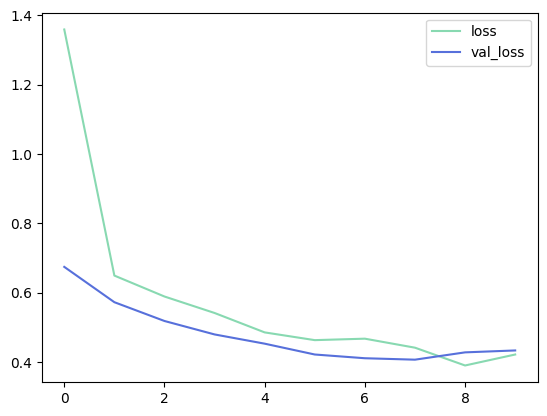

In [ ]:
losses = pd.DataFrame(inception_model.history.history)
losses[['loss','val_loss']].plot(color=['#88D9B1', '#5770DB']);

2/2 [==============================] - 28s 12s/step
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        32
           1       0.91      0.66      0.76        32

    accuracy                           0.80        64
   macro avg       0.82      0.80      0.79        64
weighted avg       0.82      0.80      0.79        64



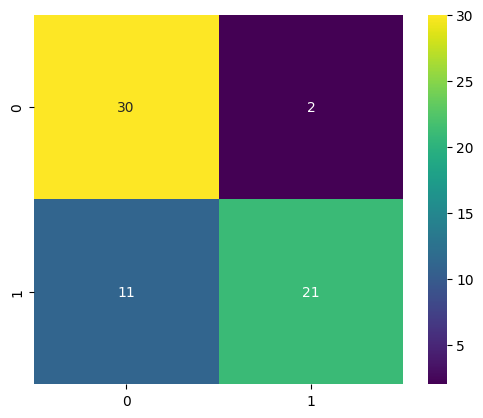

In [ ]:
pred_probabilities = inception_model.predict(test_set)
predictions = pred_probabilities > 0.5

print(classification_report(test_set.classes,predictions))


from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(df_test['pattern_type'].map({'head_and_shoulder': 0, 'inverse_head_and_shoulder': 1}),predictions)
f = sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', square=True)

In [ ]:
inception_model_accuracy = losses['val_accuracy'].iloc[-1].round(2) * 100
inception_model_accuracy

80.0

In [ ]:
inception_model.save('baseline_inception_pattern.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
benchmark_testset_gen = test_datagen
benchmark_testset = benchmark_testset_gen.flow_from_dataframe(dataframe = df_test,
                                            x_col='image_path',
                                            y_col='pattern_type',
                                            class_mode='binary',
                                            target_size=(image_shape[0],image_shape[1]),
                                            shuffle=False,
                                            batch_size=32);

# Our model: 70 images + GAN Generated Image from 70 images, together 420*2 + 70 = 910 images

## GAN image generation process: https://www.kaggle.com/code/haohanwangba/notebook71e1a75add

In [ ]:
# empty lists to store image paths
hs_img_path = []
ihs_img_path = []

#  !TODO: FIX ME HERE
# Replace the path in the os.listdir to the file path to our dataset. What should them be and how to set it up for sharing?
for image_path in os.listdir('../content/drive/MyDrive/CandleStick-image/H&S-NonShaded/H&S-NonShaded-Bear-90_'): # loop through all image names in 'H&S' folder
    hs_img_path.append('../content/drive/MyDrive/CandleStick-image/H&S-NonShaded/H&S-NonShaded-Bear-90_/' + image_path) # create the path for the particular image

for image_path in os.listdir('../content/drive/MyDrive/CandleStick-image/H&S-NonShaded/H&S-NonShaded-Bull-10_'): # loop through all image names in 'H&S' folder
    hs_img_path.append('../content/drive/MyDrive/CandleStick-image/H&S-NonShaded/H&S-NonShaded-Bull-10_/' + image_path) # create the path for the particular image
#adding GAN images
for image_path in os.listdir('../content/drive/MyDrive/gan_hs'):
  hs_img_path.append('../content/drive/MyDrive/gan_hs/' + image_path) # create the path for the particular image

for image_path in os.listdir('../content/drive/MyDrive/CandleStick-image/IH&S-NonShaded/IH&S-NonShaded-Bear-10_'): # loop through all image names in 'IH&S' folder
    ihs_img_path.append('../content/drive/MyDrive/CandleStick-image/IH&S-NonShaded/IH&S-NonShaded-Bear-10_/' + image_path) # create the path for the particular image

for image_path in os.listdir('../content/drive/MyDrive/CandleStick-image/IH&S-NonShaded/IH&S-NonShaded-Bull-90_'): # loop through all image names in 'IH&S' folder
    ihs_img_path.append('../content/drive/MyDrive/CandleStick-image/IH&S-NonShaded/IH&S-NonShaded-Bull-90_/' + image_path) # create the path for the particular image
#adding GAN images
for image_path in os.listdir('../content/drive/MyDrive/gan_ihs'): # loop through all image names in 'IH&S' folder
    ihs_img_path.append('../content/drive/MyDrive/gan_ihs/' + image_path) # create the path for the particular image

pattern_type_hs = len(hs_img_path) * ['head_and_shoulder'] # create a list with all values as 'parasitized' with the length of list being the length of par_img_path
pattern_type_ihs = len(ihs_img_path) * ['inverse_head_and_shoulder'] # create a list with all values as 'uninfected' with the length of list being the length of uninf_img_path

# create a dataframe with a column containing hs images' path and another column with the label from pattern
df_hs = pd.DataFrame({'image_path': hs_img_path, 'pattern_type': pattern_type_hs})
# create a dataframe with a column containing ihs images' path and another column with the label from pattern
df_ihs = pd.DataFrame({'image_path': ihs_img_path, 'pattern_type': pattern_type_ihs})

df = pd.concat([df_hs, df_ihs]) # concat both the dataframes along rows to get the final dataframe

df = df.reset_index(drop=True) # reset index to be from 0 to length of dataframe. drop=True drops the initial index, which otherwise is added as a new column
df

,image_path,pattern_type
0,../content/drive/MyDrive/CandleStick-image/H&S...,head_and_shoulder
1,../content/drive/MyDrive/CandleStick-image/H&S...,head_and_shoulder
2,../content/drive/MyDrive/CandleStick-image/H&S...,head_and_shoulder
3,../content/drive/MyDrive/CandleStick-image/H&S...,head_and_shoulder
4,../content/drive/MyDrive/CandleStick-image/H&S...,head_and_shoulder
...,...,...
905,../content/drive/MyDrive/gan_ihs/ihs394.jpg,inverse_head_and_shoulder
906,../content/drive/MyDrive/gan_ihs/ihs404.jpg,inverse_head_and_shoulder
907,../content/drive/MyDrive/gan_ihs/ihs389.jpg,inverse_head_and_shoulder
908,../content/drive/MyDrive/gan_ihs/ihs414.jpg,inverse_head_and_shoulder


## Example GAN HS Image

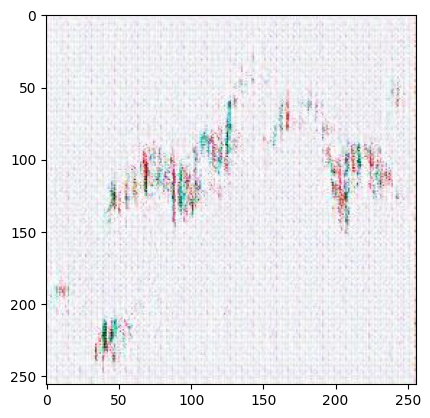

In [ ]:
plt.imshow(imread('../content/drive/MyDrive/gan_hs/' + os.listdir('../content/drive/MyDrive/gan_hs')[0]));

## Example GAN IHS Image

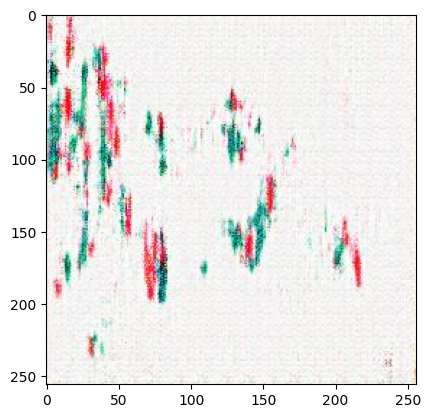

In [ ]:
plt.imshow(imread('../content/drive/MyDrive/gan_ihs/' + os.listdir('../content/drive/MyDrive/gan_ihs')[0]));

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_hs, test_hs = train_test_split(df[df['pattern_type'] == 'head_and_shoulder'],test_size=0.15) # test set is 15% of available data
train_ihs, test_ihs = train_test_split(df[df['pattern_type'] == 'inverse_head_and_shoulder'],test_size=0.15) # test set is 15% of available data
df_train = pd.concat([train_hs, train_ihs])
df_test = pd.concat([test_hs, test_ihs])
# empty lists to store length and width of images
dim1 = []
dim2 = []

for image_filename in df_test['image_path']:
    if image_filename[-3:] == 'png' or image_filename[-3:] == 'jpg': # to eliminate encountering Thumbs.db (Thumbs.db is nothing but the image cache file)
        img = imread(image_filename)
        d1,d2,colors = img.shape #(image.shape is in the form (130, 130, 3))
        dim1.append(d1)
        dim2.append(d2)

# generate batches for training
training_set =  train_datagen.flow_from_dataframe(dataframe = df_train,
                                                  x_col='image_path', # column in `dataframe` that contains the filenames
                                                  y_col='pattern_type', # column in `dataframe` that has the target data
                                                  class_mode='binary', # because oyr dataset is binary
                                                  target_size=(image_shape[0],image_shape[1]), # target image size (length, width)
                                                  batch_size=32); # add batch size

# generate batches for testing
test_set = test_datagen.flow_from_dataframe(dataframe = df_test,
                                            x_col='image_path',
                                            y_col='pattern_type',
                                            class_mode='binary',
                                            target_size=(image_shape[0],image_shape[1]),
                                            shuffle=False,
                                            batch_size=32);

Found 772 validated image filenames belonging to 2 classes.
Found 138 validated image filenames belonging to 2 classes.


In [ ]:
inception = InceptionV3(input_shape=image_shape, weights='imagenet', include_top=False)
for layer in inception.layers:
  layer.trainable = False

x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

inception_model = Model(inputs=inception.input, outputs=predictions)

inception_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
results = inception_model.fit(training_set,epochs=50,
                              validation_data=test_set,
                              callbacks=[early_stop]) ## set early stop as false to try increase accuracy

Epoch 1/50
25/25 [==============================] - 458s 17s/step - loss: 0.4315 - accuracy: 0.8368 - val_loss: 0.0647 - val_accuracy: 0.9710
Epoch 2/50
25/25 [==============================] - 383s 15s/step - loss: 0.0536 - accuracy: 0.9702 - val_loss: 0.0473 - val_accuracy: 0.9710
Epoch 3/50
25/25 [==============================] - 420s 17s/step - loss: 0.0417 - accuracy: 0.9806 - val_loss: 0.0406 - val_accuracy: 0.9710
Epoch 4/50
25/25 [==============================] - 378s 15s/step - loss: 0.0581 - accuracy: 0.9728 - val_loss: 0.0637 - val_accuracy: 0.9638
Epoch 5/50
25/25 [==============================] - 406s 16s/step - loss: 0.0447 - accuracy: 0.9819 - val_loss: 0.0300 - val_accuracy: 0.9855
Epoch 6/50
25/25 [==============================] - 376s 15s/step - loss: 0.0292 - accuracy: 0.9858 - val_loss: 0.0322 - val_accuracy: 0.9855
Epoch 7/50
25/25 [==============================] - 374s 15s/step - loss: 0.0324 - accuracy: 0.9845 - val_loss: 0.0318 - val_accuracy: 0.9855


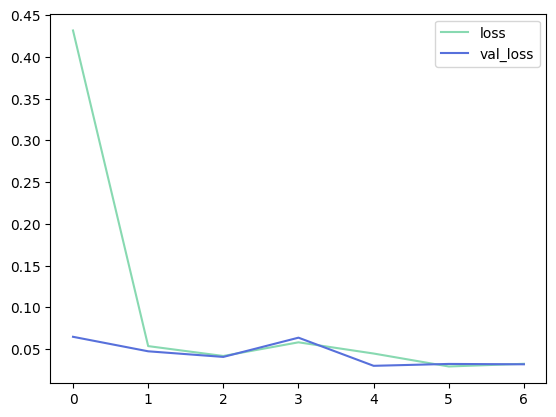

In [ ]:
losses = pd.DataFrame(inception_model.history.history)
losses[['loss','val_loss']].plot(color=['#88D9B1', '#5770DB']);

5/5 [==============================] - 55s 10s/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        69
           1       0.99      0.99      0.99        69

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138



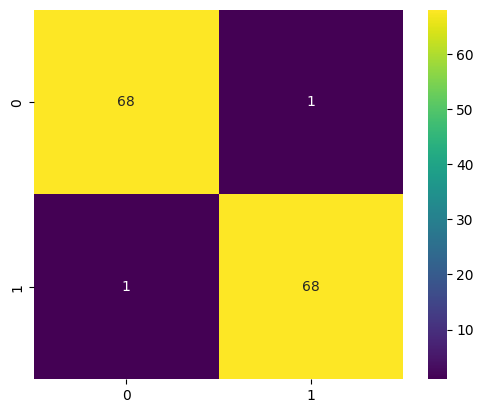

In [ ]:
pred_probabilities = inception_model.predict(test_set)
predictions = pred_probabilities > 0.5

print(classification_report(test_set.classes,predictions))


from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(df_test['pattern_type'].map({'head_and_shoulder': 0, 'inverse_head_and_shoulder': 1}),predictions)
f = sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', square=True)

In [ ]:
inception_model_accuracy = losses['val_accuracy'].iloc[-1].round(2) * 100
inception_model_accuracy

99.0

In [ ]:
inception_model.save('gan_inception_pattern.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Benchmark: Use GAN empowered CNN on original test set

In [ ]:
benchmark_testset

In [ ]:
loss, accuracy = inception_model.evaluate(benchmark_testset)

# Print out the results
print(f"Loss on the benchmark test set: {loss}")
print(f"Accuracy on the benchmark test set: {accuracy}%")

2/2 [==============================] - 36s 14s/step - loss: 1.0096 - accuracy: 0.5000
Loss on the benchmark test set: 1.0095882415771484
Accuracy on the benchmark test set: 0.5%
